In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from imblearn.under_sampling import *

In [2]:
data = pd.read_csv('./datas/socar_sample_dataset/2_insurance_fraud_detect_data/insurance_fraud_detect_data.csv')
data
#data[data["fraud_YN"] == 0]

#car_model 차종
#sharing_type:부름 / 쏘카
#age_group 연령대
#has_previous_accident 누적 사고 유무
#cumulative_use_count 누적 대여 횟수
#b2b 법인이용
#accident_ratio 과실율
#pf_type 보험료 타입 선택 (PF5, PF30, PF70)
#socarpass 쏘카패스
#socarsave 쏘카세이브
#start_hour 이용시작시간
#duration 대여기간
#accident_hour 사고시각
#repair_cost 차량수리비용
#insure_cost 보험손해비용

#accident_location 사고위치
#car_part1 전면 손상
#car_part2 후면 손상
#repair_cnt 수리 부위 갯수
#acc_type1 사고타입(전면충돌, 차대인, 자전거, 알수없음 등등)

#사고 유형1 : 차대인(10) 차대차(20) 차량단독(30) 보행중(40) 자전거(50) 기타(99)
#case when acdnt_clas_cd1 = "차대차" then 1
#when acdnt_clas_cd1 = "차대인" then 2
#when acdnt_clas_cd1 = "차량단독" then 3
#when acdnt_clas_cd1 = " 차대자전거" then 4
#else 0
#end as acc_type1,
#기타 : 건물이랑 부딫히는 등 정말로 '기타'

#insurance_site_aid_YN 보험사 현장출동 유무
#police_site_aid_YN 경찰 현장출동 유무

# 스모트 방식 ..? : KNN처럼 근처에 있는 아이들 늘리기 ..?
# 0 필터링 시키기 : 패턴 분석하기
# 논문 : 비대칭 데이터 분류, 자동차 보험 사기 - 네이버 학술정보 최신순
# 기사 ㅣ 쏘카 디펑

# 사기 데이터 : 전면손상
# 단기렌트 
# 보험손해비용 - 차량수리비용 = ?

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0


In [3]:
data[data['police_site_aid_YN']==2]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set


In [4]:
data["fraud_YN"].value_counts()

0    15959
1       41
Name: fraud_YN, dtype: int64

In [5]:
41/(15959 + 41)

0.0025625

In [6]:
df1 = data[data["fraud_YN"] == 0]
#df1 = df1.groupby(['acc_type1'])
df1

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0


In [3]:
from imblearn.under_sampling import *

## 언더 샘플링

### RandomUnderSampler

In [8]:
X = data.drop("fraud_YN", 1)
y = data["fraud_YN"]

In [9]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [10]:
#from collections import Counter
#print('Resampled dataset shape %s' % Counter(y))

In [11]:
from sklearn.model_selection import train_test_split
 
X = X_res
y = y_res
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

57
25
57
25


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

[1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1]
정확도 : 0.6
precision 0.6
recall 0.6923076923076923
f1 0.6428571428571429


### Tomek’s link method

In [13]:
X = data.drop("fraud_YN", 1)
y = data["fraud_YN"]

In [14]:
from imblearn.under_sampling import TomekLinks
tom = TomekLinks()
X_tom, y_tom = tom.fit_resample(X, y)

In [15]:
from sklearn.model_selection import train_test_split
 
X = X_tom
y = y_tom
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

11183
4794
11183
4794


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Condensed Nearest Neighbour

In [17]:
X = data.drop("fraud_YN", 1)
y = data["fraud_YN"]

In [18]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=42)
X_cnn, y_cnn = cnn.fit_resample(X, y)

In [19]:
from sklearn.model_selection import train_test_split
 
X = X_cnn
y = y_cnn
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

300
129
300
129


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
정확도 : 0.9069767441860465
precision 0.0
recall 0.0
f1 0.0


### One Sided Selection

In [19]:
X = data.drop("fraud_YN", 1)
y = data["fraud_YN"]

In [20]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=0)
X_oss, y_oss = oss.fit_resample(X, y)

In [21]:
from sklearn.model_selection import train_test_split
 
X = X_oss
y = y_oss
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

11072
4746
11072
4746


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Edited Nearest Neighbours

In [23]:
X = data.drop("fraud_YN", 1)
y = data["fraud_YN"]

In [24]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(kind_sel="all", n_neighbors=5)
X_enn, y_enn = enn.fit_resample(X, y)

In [25]:
from sklearn.model_selection import train_test_split
 
X = X_enn
y = y_enn
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

11072
4746
11072
4746


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Neighbourhood Cleaning Rule

In [27]:
X = data.drop("fraud_YN", 1)
y = data["fraud_YN"]

In [28]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5)
X_ncr, y_ncr = ncr.fit_resample(X, y)

In [29]:
from sklearn.model_selection import train_test_split
 
X = X_ncr
y = y_ncr
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

11056
4739
11056
4739


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## 복합 샘플링

- SMOTEENN: SMOTE + ENN
- SMOTETomek: SMOTE + Tomek

### SMOTEENN

In [3]:
X = data.drop("fraud_YN", 1)
y = data["fraud_YN"]

In [6]:
from imblearn.combine import *
stn = SMOTEENN(random_state=0)
X_stn, y_stn = stn.fit_resample(X, y)

In [7]:
from sklearn.model_selection import train_test_split
 
X = X_stn
y = y_stn
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

14136
6059
14136
6059


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

[1 0 0 ... 1 1 0]
[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 

### SMOTETomek

In [61]:
X = data.drop("fraud_YN", 1)
y = data["fraud_YN"]

In [66]:
from imblearn.under_sampling import *
stt = SMOTETomek(random_state=4)
X_stt, y_stt = stt.fit_resample(X, y)

In [67]:
from sklearn.model_selection import train_test_split
 
X = X_stt
y = y_stt
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

19744
8462
19744
8462


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

[1 1 0 ... 0 0 1]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4225,    6],
       [   7, 4224]])

In [87]:
y = data["fraud_YN"]

In [88]:
fraud = data.drop("fraud_YN", 1)

In [89]:
y_pred = forest.predict(fraud)
confusion_matrix(y, y_pred)

array([[15945,    14],
       [    9,    32]])

In [86]:
print('정확도 :', metrics.accuracy_score(y, y_pred))

print('precision', metrics.precision_score(y, y_pred))

print('recall', metrics.recall_score(y, y_pred))

print('f1', metrics.f1_score(y, y_pred))

정확도 : 0.7804878048780488
precision 1.0
recall 0.7804878048780488
f1 0.8767123287671234


### 분포확인

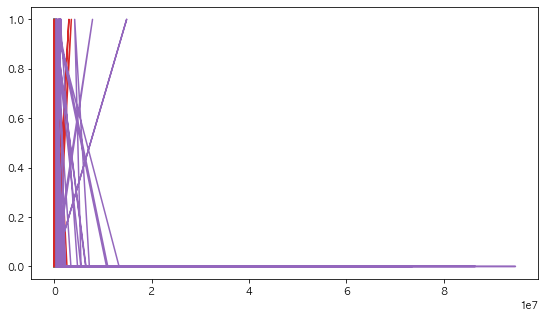

In [52]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.plot(X_tom, y_tom)